### The motivation behind scaling the dot product in self-attention

The goal of applying the softmax function to the dot product of queries and keys is to create a series of weights that all sum to 1 and are guranteed positive. These weights can then be applied to the _values_ and used to produce the final output at time step $ t $. 

In the paper _attention is all you need_, it looks like this:

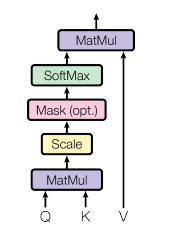

Note that the softmax is defined as:

$\Large s_i = \frac{e^{z_i}}{\sum_{j}e^{z_j}} $

Why do we scale and how is it done? Scaling is done because the softmax equation isn't _scale invariant_. For example, if you take a set of normally distributed values $ V $ and scale them by some number to produce a new set $ V' $, the large numbers in $ V $ will be scaled to swamp out all other values in $ V' $. 

Example. 

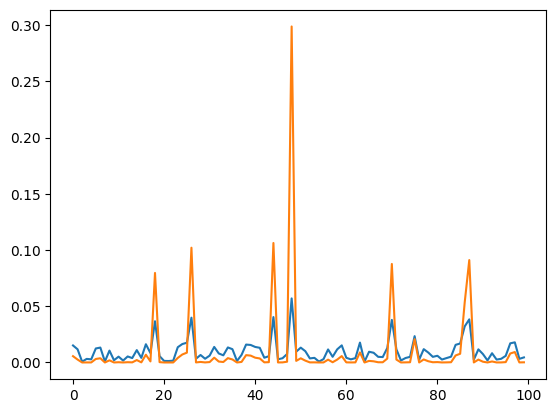

In [2]:
import numpy as np

small_distribution = np.random.normal(loc=1, size=(100,))
large_distribution = small_distribution * 3

import scipy as sp

small_distribution_softmax = sp.special.softmax(small_distribution)
large_distribution_softmax = sp.special.softmax(large_distribution)

import matplotlib.pyplot as plt

x_axis = np.arange(0,100)

plt.plot(x_axis, small_distribution_softmax)
plt.plot(x_axis, large_distribution_softmax)

The authors chose to scale the input by the square root of the length of the vectors. The _key vector_ is defined to be 64 elements in length, and so the authors divide the vector's elements by 8. This tamps down the potential for large values from swamping out the rest. 